Imports


In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

In [4]:
def median_filter_manual(img, kernel_size):
    rows, cols = img.shape
    filtered_img = np.zeros_like(img)

    padding = kernel_size // 2
    padded_img = cv2.copyMakeBorder(img, padding, padding, padding, padding, cv2.BORDER_REPLICATE)

    for i in range(rows):
        for j in range(cols):
            # Corrected neighborhood extraction
            neighborhood = padded_img[i:i + kernel_size, j:j + kernel_size]
            filtered_img[i, j] = np.median(neighborhood)
    return filtered_img


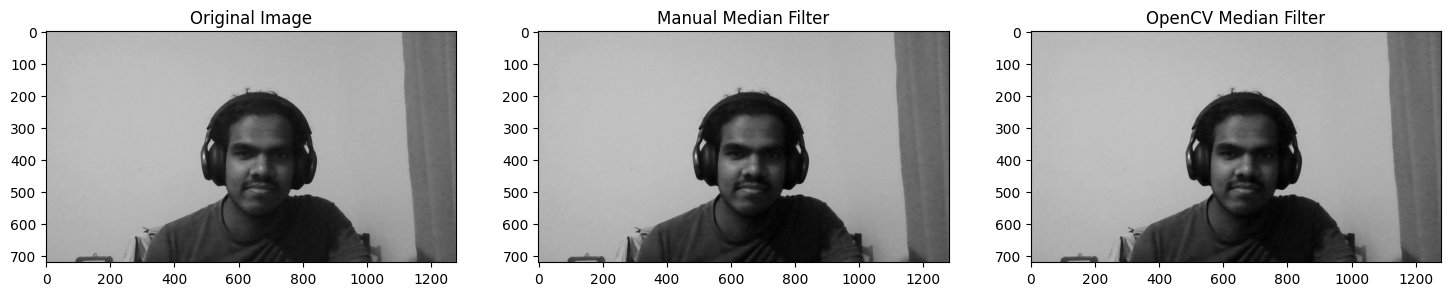

In [43]:
# Load the image in grayscale
img = cv2.imread('/content/WIN_20250109_20_45_19_Pro.jpg', cv2.IMREAD_GRAYSCALE)

# Apply manual median filter
manual_median = median_filter_manual(img, 3)

# Apply OpenCV's median filter for comparison
opencv_median = cv2.medianBlur(img, 3)

# Plotting the images
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(img, cmap='gray')

plt.subplot(1, 3, 2)
plt.title("Manual Median Filter")
plt.imshow(manual_median, cmap='gray')

plt.subplot(1, 3, 3)
plt.title("OpenCV Median Filter")
plt.imshow(opencv_median, cmap='gray')

plt.show()

In [44]:
def edge_detection(img):
    # Create the Laplacian kernel
    kernel = np.array([
        [0, -1, 0],
        [-1, 4, -1],
        [0, -1, 0]
    ], dtype=np.float32)

    # Apply filter first
    updated = cv2.filter2D(img, -1, kernel)

    return updated

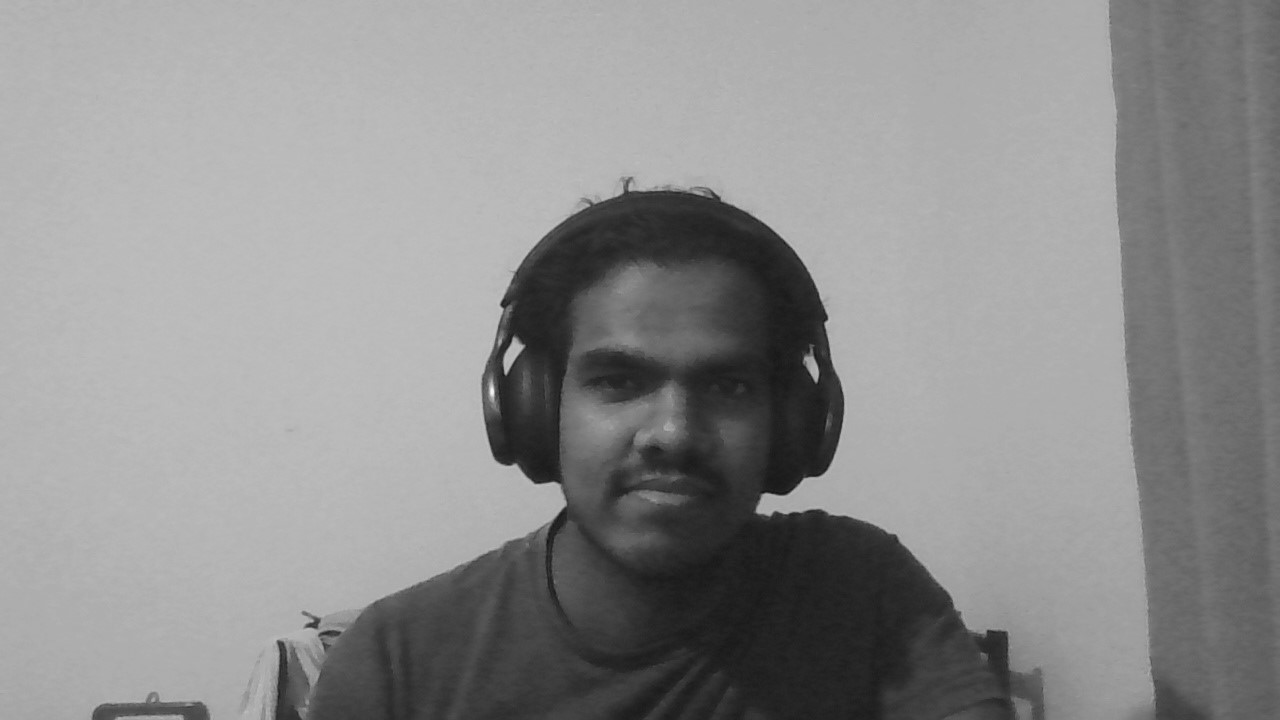

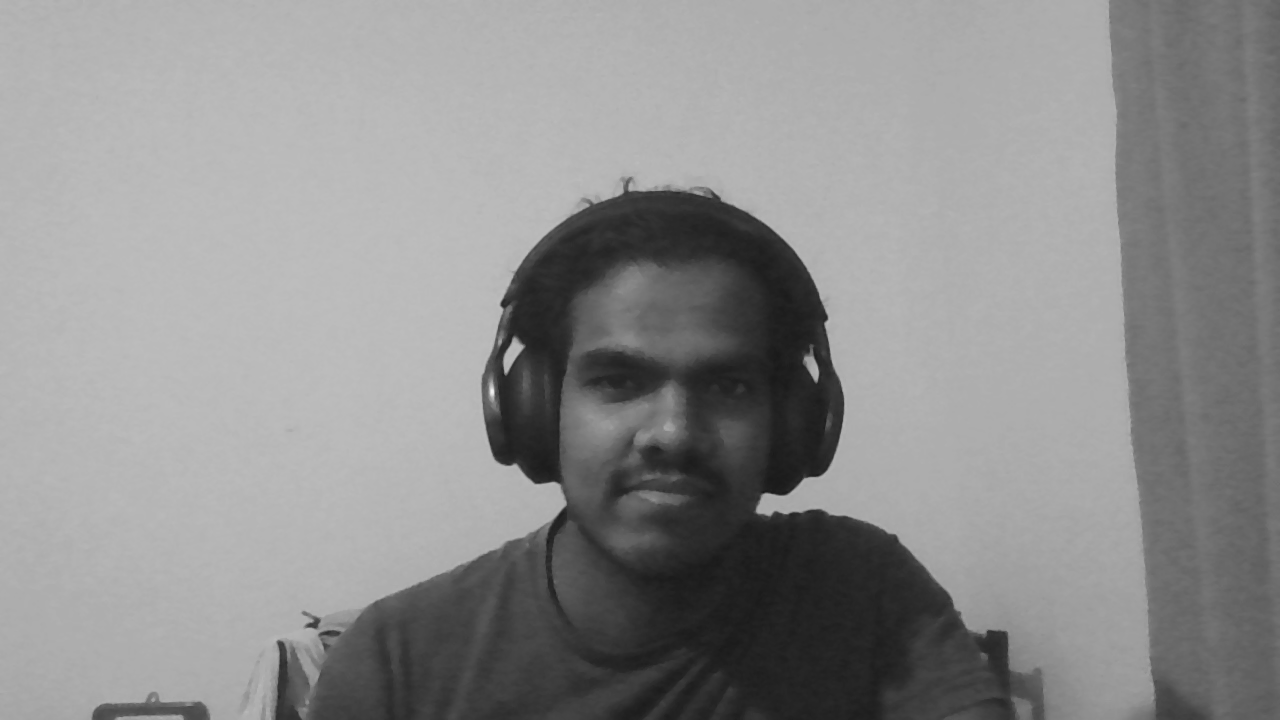

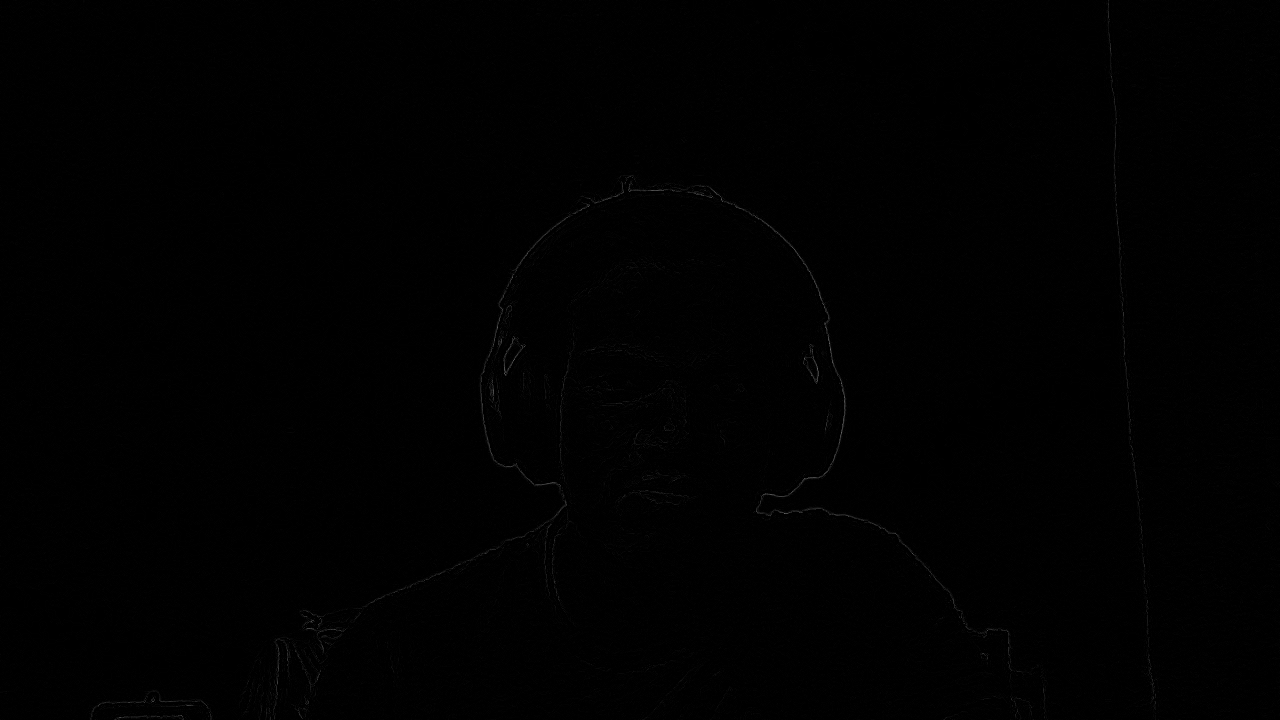

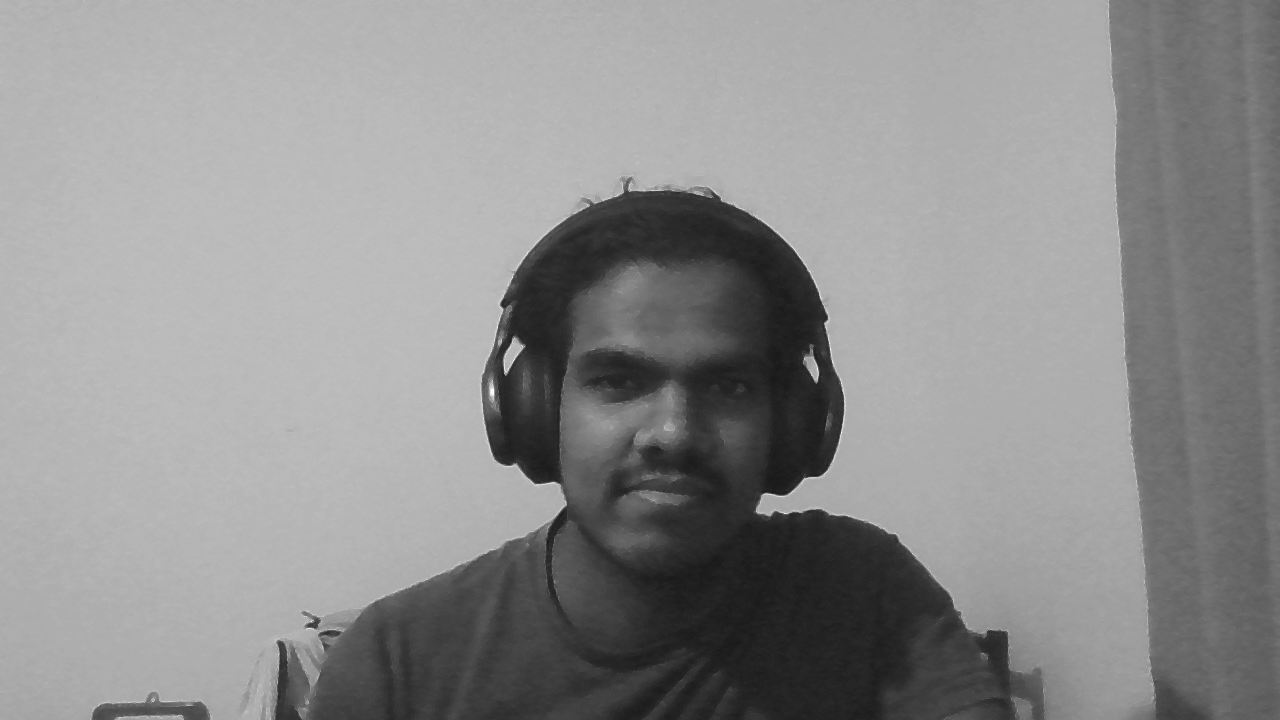

In [46]:
# Assuming 'img' is your grayscale image loaded as before
edge = edge_detection(opencv_median)

# Display the original and Laplacian-filtered images
cv2_imshow(img)
cv2_imshow(opencv_median)
cv2_imshow(edge)

updated_image = opencv_median + 0.8*edge
cv2_imshow(updated_image)
